# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
from IPython.display import Image
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
warnings.filterwarnings('ignore')

# Gather Data

### Import WeRateDogs Twitter Archive

In [2]:
#show the data in dataset csv file twitter archives

df_twitter_archives = pd.read_csv('twitter-archive-enhanced-2.csv')

### Import Tweet Image Predictions

In [3]:
# Download the image prediction file using the link provided to Udacity students

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(images.content)

335079

In [4]:
#check the content of the image predection

images.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [5]:
#Show the data in dataset file

df_image_predictions = pd.read_csv("image-predictions.tsv", sep = '\t')

### import Twitter API & JSON file

In [6]:
#show the data in dataset txt file tweeter-json.txt

df_tweet_json = pd.read_json('tweeter-json.txt',lines = True)

# Assessing the Data

### Display all Three datasets seperetly

In [7]:
df_twitter_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
df_tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Programmatic assessment

### Using Pandas functions methods to assess the data.

In [10]:
df_twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_twitter_archives.shape

(2356, 17)

In [13]:
df_twitter_archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image_predictions.shape

(2075, 12)

In [16]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [18]:
df_tweet_json.shape

(2354, 31)

In [19]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [20]:
df_tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


### Archives Dataframe Assessing

In [21]:
df_twitter_archives.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
df_twitter_archives.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Birf          1
Lipton        1
Bodie         1
Marlee        1
Florence      1
Name: name, Length: 957, dtype: int64

In [23]:
sum(df_twitter_archives['tweet_id'].duplicated())

0

In [24]:
df_twitter_archives['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
df_twitter_archives['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
df_twitter_archives['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Image Dataframe Assessing

In [27]:
df_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [28]:
df_image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
water_bottle            1
flamingo                1
espresso                1
banana                  1
soccer_ball             1
Name: p1, Length: 378, dtype: int64

In [29]:
df_image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
home_theater            1
desk                    1
cowboy_hat              1
accordion               1
printer                 1
Name: p2, Length: 405, dtype: int64

In [30]:
df_image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
parallel_bars          1
spatula                1
hatchet                1
tripod                 1
jaguar                 1
Name: p3, Length: 408, dtype: int64

In [31]:
Image(url = 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg')

In [32]:
Image(url = 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg')

### Tweet Dataframe Assessing

In [33]:
df_tweet_json.info()
df_tweet_json.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


# Clean

## Quality

### Define

- Making a copy from all three dataframes to clean them
- Check notnull in retweeted_status_id
- Select the needed columns from tweet count (tweet.json) dataframe
- Merge the clean versions of df_twitter_archive, df_image_predictions, and df_tweet_json dataframes
- Check the new Dataframe
- Convert tweet_id from an integer to a string
- Capitalize P1, P2, P3
- Fillt doggo, floofer, pupper, puppo Columns
- Create one column for the various dog types: Doggo, Floofer, Pupper, Puppo
- Convert rating_numerator from an integer to a Float
- Convert rating_denominator from an integer to a Float
- Convert the timestamp to correct datetime format
- Create one column for the various dog types: P1,P2,P3
- Drop rows that has prediction_list equal error
- Remove columns no longer needed

## Tidiness

- Change tweet_id to type int to merge with the other Dataframes
- All Dataframes should be one dataset

### Quality Issue 1: Making a copy from all three dataframes to clean them

#### Define

Making a copy from all three dataframes to clean them

#### Code

In [34]:
# Make copies of dataframes to clean 
dfclean_twitter_archives = df_twitter_archives.copy()
dfclean_image_predictions = df_image_predictions.copy()
dfclean_tweet_json = df_tweet_json.copy()

#### Test

### Check the copied dataframe

In [35]:
dfclean_twitter_archives.sample(10)
dfclean_image_predictions.sample(10)
dfclean_tweet_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1118,2016-05-13 16:15:54+00:00,731156023742988288,731156023742988288,Say hello to this unbelievably well behaved sq...,False,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 731156013890428928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4196,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
422,2017-01-18 17:07:18+00:00,821765923262631936,821765923262631936,This is Duchess. She uses dark doggo forces to...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 821765912948772865, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9317,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
633,2016-11-02 00:42:53+00:00,793614319594401792,793614319594401792,RT @dog_rates: When she says you're a good boy...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 791672307924209664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Thu Oct 27 16:06:04 +0000 2016...,NaN,NaN,NaN
451,2017-01-10 00:24:38+00:00,818614493328580609,818614493328580608,This is Bear. He's a passionate believer of th...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 818614452752760832, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10971,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1844,2015-12-12 23:41:18+00:00,675822767435051008,675822767435051008,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675822760556412928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1652,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
330,2017-02-18 17:00:10+00:00,832998151111966721,832998151111966720,This is Rhino. He arrived at a shelter with an...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 832998142459011073, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14549,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1914,2015-12-08 19:19:32+00:00,674307341513269249,674307341513269248,This is life-changing. 12/10 https://t.co/SroT...,False,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,12129,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2188,2015-11-24 01:11:27+00:00,668960084974809088,668960084974809088,Meet Jaycob. He got scared of the vacuum. Hide...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668960082093297664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,757,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1401,2016-02-16 02:04:04+00:00,699413908797464576,699413908797464576,Meet Miley. She's a Scandinavian Hollabackgirl...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 699413904074665988, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2258,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1464,2016-02-02 02:10:14+00:00,694342028726001664,694342028726001664,It's okay pup. This happens every time I liste...,False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,1727,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [36]:
dfclean_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True
1571,794983741416415232,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
367,672964561327235073,https://pbs.twimg.com/media/CVbZsouWUAIsxMc.jpg,1,Chihuahua,0.292343,True,pug,0.173364,True,French_bulldog,0.045507,True
314,671729906628341761,https://pbs.twimg.com/media/CVJ2yR2UwAAdCzU.jpg,1,kuvasz,0.431469,True,Samoyed,0.117122,True,white_wolf,0.090067,False
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
477,675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,llama,0.284394,False,standard_poodle,0.132569,True,teddy,0.127975,False
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True


In [37]:
dfclean_tweet_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1831,2015-12-13 21:07:04+00:00,676146341966438401,676146341966438400,This is Bert. He likes flowers. 10/10 https://...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676146336014667776, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2077,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1809,2015-12-15 17:42:34+00:00,676819651066732545,676819651066732544,Watch out Airbud. This pupper is also good at ...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676819644326506496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1957,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1504,2016-01-25 22:58:05+00:00,691756958957883396,691756958957883392,THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 691756951399591936, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3179,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1195,2016-04-04 15:22:08+00:00,717009362452090881,717009362452090880,This is Smokey. He's having some sort of exist...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717009356240384000, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3583,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
90,2017-06-13 01:14:41+00:00,874434818259525634,874434818259525632,RT @dog_rates: This is Coco. At first I though...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,NaN,NaN,NaN
270,2017-03-13 00:02:39+00:00,841077006473256960,841077006473256960,This is Dawn. She's just checking pup on you. ...,False,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 841077001360461824, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,24926,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1185,2016-04-08 15:26:28+00:00,718460005985447936,718460005985447936,Meet Bowie. He's listening for underground squ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 718459997370335232, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2846,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1836,2015-12-13 04:40:46+00:00,675898130735476737,675898130735476736,I'm sure you've all seen this pupper. Not prep...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675898073508421632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1774,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1651,2016-01-03 01:39:57+00:00,683462770029932544,683462770029932544,"""Hello forest pupper I am house pupper welcome...",False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 683462766443802624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2676,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
603,2016-11-15 17:54:59+00:00,798585098161549313,798585098161549312,RT @dog_rates: This is Timison. He just told a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 03:29:07 +0000 2015...,NaN,NaN,NaN


### Quality Issue 2: Delete retweets

#### Define

Delete retweets

#### Code

In [38]:
#Check notnull in retweeted_status_id

#dfclean_twitter_archives.drop(dfclean_twitter_archives[dfclean_twitter_archives['retweeted_status_id'].notnull()])
dfclean_twitter_archives = dfclean_twitter_archives[dfclean_twitter_archives['retweeted_status_id'].isnull()]
sum(dfclean_twitter_archives["retweeted_status_id"].notnull())

0

#### Test

In [39]:
dfclean_twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality Issue 3: Select the needed columns from tweet count Dataframe

#### Define

Select the needed columns from tweet count Dataframe (id, retweet_count, favorite_count)

#### Code

In [40]:
dfclean_tweet_json = dfclean_tweet_json[["id", "retweet_count", "favorite_count"]]

#### Test

In [41]:
dfclean_tweet_json.sample(10)

,id,retweet_count,favorite_count
146,863432100342583297,5664,24829
1952,673656262056419329,265,769
919,756288534030475264,15071,28519
1975,672988786805112832,314,1039
646,793135492858580992,2893,7214
1202,716080869887381504,1935,5272
2138,670003130994700288,100,352
2300,667012601033924608,237,471
668,790227638568808452,4190,0
1372,701952816642965504,1149,4167


In [42]:
dfclean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality Issue 4: Merge all three Dataframes in one Dataframe

#### Define

Merge all three Dataframes in one Dataframe called df

#### Code

In [43]:
#merge all three dataframes in one dataframe called df

df = pd.concat([dfclean_twitter_archives, dfclean_image_predictions, dfclean_tweet_json], join ='outer',axis=1)
df1= df

#### Test

#### Checking the new Dataframe

In [44]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,8853.0,39467.0
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,6514.0,33819.0
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,4328.0,25461.0
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,8964.0,42908.0
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,9774.0,41048.0


In [45]:
df.shape

(2356, 32)

In [46]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [48]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,tweet_id,img_num,p1_conf,p2_conf,p3_conf,id,retweet_count,favorite_count
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2.354000e+03,2354.000000,2354.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.215172,10.492874,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02,7.426978e+17,3164.797366,8080.968564
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.725696,7.019084,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02,6.783975e+17,624.500000,1415.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02,7.194596e+17,1473.500000,3603.500000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,79515.000000,132810.000000


In [49]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
354,8.312626e+17,NaN,NaN,2017-02-13 22:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831262627...,...,True,Great_Pyrenees,0.112517,True,golden_retriever,0.038351,True,8.309562e+17,1735.0,8735.0
196,8.547327e+17,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marlee. She fetched a flower and immed...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854732716...,...,True,Siberian_husky,0.214474,True,white_wolf,0.147235,False,8.544824e+17,7608.0,31131.0
1725,6.800705e+17,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,...,False,cab,0.000160,False,crane,0.000002,False,6.798771e+17,726.0,2155.0
481,8.156394e+17,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,...,True,ice_bear,0.218289,False,kuvasz,0.139911,True,8.153904e+17,4407.0,11467.0
1191,7.178418e+17,NaN,NaN,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717841801...,...,True,beagle,0.210975,True,vizsla,0.076443,True,7.175377e+17,2069.0,6281.0
830,7.688551e+17,NaN,NaN,2016-08-25 16:58:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jesse. He really wants a belly rub. Wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768855141...,...,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True,7.685963e+17,1473.0,5592.0
59,8.808724e+17,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,...,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True,8.804658e+17,6546.0,29075.0
478,8.159661e+17,NaN,NaN,2017-01-02 17:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with squeaky hiccups. Please e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815966073...,...,True,Cardigan,0.116810,True,chow,0.039036,True,8.157460e+17,4797.0,0.0
2123,6.703857e+17,NaN,NaN,2015-11-27 23:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703619e+17,71.0,344.0
1659,6.830988e+17,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,...,True,Cardigan,0.189890,True,beagle,0.001965,True,6.830301e+17,832.0,2370.0


### Quality Issue 5: Convert tweet_id Column to Str

#### Define

Convert tweet_id Column to str insted of int


#### Code

In [50]:
#Convert tweet_id Column to str insted of int

dfclean_twitter_archives['tweet_id'] = dfclean_twitter_archives['tweet_id'].astype(str)
dfclean_image_predictions['tweet_id'] = dfclean_image_predictions['tweet_id'].astype(str)

#### Test

In [51]:
dfclean_twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [52]:
dfclean_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1660,811627233043480576,https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg,1,beagle,0.396280,True,Pembroke,0.049562,True,wire-haired_fox_terrier,0.046349,True
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,0.032906,False
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
685,683857920510050305,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,1,bluetick,0.174738,True,Shetland_sheepdog,0.126101,True,beagle,0.122887,True
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,Chesapeake_Bay_retriever,0.371146,True,water_buffalo,0.099596,False,Weimaraner,0.048968,True
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True
184,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,Chihuahua,0.973990,True,French_bulldog,0.010832,True,Pekinese,0.002099,True


### Quality Issue 6: Capitalize P1, P2, P3

#### Define

Capitalize each name of the Dog names in p1, p2, p3 Columns

#### Code

In [53]:
#Capitalize p1,p2,p3

dfclean_image_predictions['p1'] = dfclean_image_predictions['p1'].str.title()
dfclean_image_predictions['p2'] = dfclean_image_predictions['p2'].str.title()
dfclean_image_predictions['p3'] = dfclean_image_predictions['p3'].str.title()

#### Test

In [54]:
dfclean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [55]:
dfclean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality Issue 7: Filter doggo, floofer, pupper, puppo Columns

#### Define

Filter doggo, floofer, pupper, puppo Columns to get the values of Doggo type 

#### Code

In [56]:
#fillt doggo column

df['doggo'].sample(50)
doggofilt = df['doggo'] == 'doggo'

#### Test

In [57]:
df[doggofilt]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,8.902403e+17,7711.0,32467.0
43,8.841627e+17,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,...,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,8.838381e+17,3586.0,22349.0
99,8.729671e+17,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,...,True,pug,0.093494,True,ice_bear,0.069038,False,8.728207e+17,3884.0,15029.0
108,8.715159e+17,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,...,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True,8.711662e+17,5991.0,0.0
110,8.711025e+17,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,...,True,Pekinese,0.168445,True,Chihuahua,0.008950,True,8.710326e+17,3999.0,23255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,7.323752e+17,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,...,True,Samoyed,0.167173,True,kuvasz,0.145715,True,7.312853e+17,1090.0,3798.0
1141,7.276445e+17,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,...,False,patio,0.074205,False,prison,0.013826,False,7.273144e+17,834.0,3623.0
1156,7.247717e+17,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,...,True,beaver,0.028831,False,dhole,0.017379,False,7.240499e+17,1984.0,4738.0
1176,7.199912e+17,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,...,True,Cardigan,0.049874,True,Chihuahua,0.011603,True,7.195514e+17,2192.0,5515.0


#### Define

Filter doggo, floofer, pupper, puppo Columns to get the values of Floofer type 

#### Code

In [58]:
#fillt floofer column

df['floofer'].sample(50)
flooferfilt = df['floofer'] == 'floofer'

#### Test

In [59]:
df[flooferfilt]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
46,8.833607e+17,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True,8.831178e+17,6949.0,37914.0
200,8.540102e+17,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True,8.537609e+17,6403.0,30414.0
582,8.003883e+17,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,...,True,silky_terrier,0.129567,True,Lakeland_terrier,0.094727,True,8.001886e+17,4581.0,0.0
774,7.762182e+17,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,...,True,mashed_potato,0.208564,False,Labrador_retriever,0.077481,True,7.762015e+17,2919.0,10681.0
984,7.493170e+17,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,...,False,kuvasz,0.149391,True,Great_Pyrenees,0.106003,True,7.490644e+17,1714.0,5277.0
1022,7.465429e+17,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,...,True,wire-haired_fox_terrier,0.118622,True,Lakeland_terrier,0.106806,True,7.465074e+17,1226.0,5094.0
1091,7.374459e+17,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,...,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True,7.373107e+17,8329.0,16040.0
1110,7.338223e+17,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,...,False,pug,0.018877,True,quilt,0.007628,False,7.334601e+17,1451.0,4605.0
1534,6.899935e+17,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,...,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True,6.899055e+17,787.0,2651.0
1614,6.853075e+17,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,...,True,Siberian_husky,0.335774,True,malamute,0.134589,True,6.851990e+17,764.0,2566.0


#### Define

Filter doggo, floofer, pupper, puppo Columns to get the values of Pupper type

#### Code

In [60]:
#fillt pupper column

df['pupper'].sample(50)
pupperfilt = df['pupper'] == 'pupper'

#### Test

In [61]:
df[pupperfilt]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
29,8.863661e+17,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,...,False,barracouta,0.271485,False,gar,0.189945,False,8.862670e+17,4.0,117.0
49,8.827627e+17,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,...,True,toy_poodle,0.124030,True,teddy,0.110183,False,8.826273e+17,6342.0,28382.0
56,8.815360e+17,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,False,doormat,0.103259,False,space_heater,0.042568,False,8.812684e+17,5358.0,23501.0
82,8.768381e+17,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,...,True,ice_bear,0.132264,False,weasel,0.005730,False,8.765377e+17,4800.0,23869.0
92,8.742968e+17,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,...,True,miniature_poodle,0.202225,True,teddy,0.004047,False,8.740576e+17,4125.0,23134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6.725950e+17,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,...,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True,6.725913e+17,207.0,782.0
2002,6.724813e+17,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,...,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,6.724661e+17,598.0,1447.0
2009,6.722542e+17,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,...,True,collie,0.215975,True,Appenzeller,0.128507,True,6.722453e+17,169.0,733.0
2015,6.722054e+17,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,...,True,vizsla,0.124353,True,bath_towel,0.073320,False,6.721600e+17,395.0,918.0


#### Define

Filter doggo, floofer, pupper, puppo Columns to get the values of Puppo type

#### Code

In [62]:
#fillt puppo column

df['puppo'].sample(50)
puppofilt = df['puppo'] == 'puppo'

#### Test

In [63]:
df[puppofilt]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
12,8.896654e+17,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,8.896654e+17,8538.0,38818.0
14,8.895311e+17,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,True,German_shepherd,0.078260,True,malinois,0.075628,True,8.895311e+17,2321.0,15359.0
71,8.787761e+17,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,...,True,malamute,0.232006,True,Eskimo_dog,0.050635,True,8.786047e+17,7582.0,30931.0
94,8.740130e+17,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,...,False,dishwasher,0.000201,False,oscilloscope,0.000142,False,8.736976e+17,12518.0,0.0
129,8.674210e+17,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,...,True,basset,0.189214,True,Cardigan,0.113010,True,8.670727e+17,135.0,0.0
168,8.596078e+17,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,...,False,bison,0.000228,False,llama,0.000067,False,8.591970e+17,25661.0,75193.0
191,8.558515e+17,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True,8.558181e+17,5943.0,28056.0
395,8.255351e+17,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,...,False,corn,0.019421,False,pug,0.019044,True,8.251476e+17,5244.0,20181.0
398,8.250266e+17,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,...,True,Arctic_fox,0.003344,False,chow,0.002802,True,8.247964e+17,6288.0,0.0
413,8.228729e+17,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,...,True,Brabancon_griffon,0.082744,True,Chihuahua,0.045878,True,8.228591e+17,2622.0,14576.0


In [64]:
#get the value of dogs type (doggo,floofer,pupper,puppo)

df[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1831
                pupper  None      224
doggo  None     None    None       75
None   None     None    puppo      24
doggo  None     pupper  None       10
None   floofer  None    None        9
doggo  floofer  None    None        1
       None     None    puppo       1
dtype: int64

In [65]:
#get the value of dogs type (pupper) in df

df[['pupper']].value_counts()

pupper
None      1941
pupper     234
dtype: int64

In [66]:
#get the value of dogs type (puppo) in df

df[['puppo']].value_counts()

puppo
None     2150
puppo      25
dtype: int64

In [67]:
#get the value of dogs type (doggo) in df

df[['doggo']].value_counts()

doggo
None     2088
doggo      87
dtype: int64

In [68]:
#get the value of dogs type (floofer) in df

df[['floofer']].value_counts()

floofer
None       2165
floofer      10
dtype: int64

### Quality Issue 8: Create one column for the various dog types: Doggo, Floofer, Pupper, Puppo

#### Define

Create one column for the various dog types: Doggo, Floofer, Pupper, Puppo and Drop The Doggo, Floofer, Pupper, Puppo Columns From The Dataframe 

#### Code

In [69]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [70]:
# Create one column for the various dog types: Doggo, Floofer, Pupper, Puppo

df['dog_stage'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')
df = df.drop(['doggo','floofer','pupper','puppo'],axis = 1)

#### Test

In [71]:
df['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        2175 non-null   object 
 13  tweet_id                    2075 

In [73]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_id', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'id', 'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

### (Optional)filter new dataframe to get dog types columns without na and call it df_new

In [74]:
#filter new dataframe to get dog types columns without na and call it df_new

filt = (df1['puppo'] == 'puppo') | (df1['pupper'] == 'pupper') | (df1['floofer'] == 'floofer') | (df1['doggo'] == 'doggo')
df_new = df1[filt]
#df[filt]["puppo","pupper"]
df_new.columns
df_new[['doggo','floofer','pupper','puppo']].value_counts()
#dfn[["tweet_id","in_reply_to_status_id"]]

doggo  floofer  pupper  puppo
None   None     pupper  None     224
doggo  None     None    None      75
None   None     None    puppo     24
doggo  None     pupper  None      10
None   floofer  None    None       9
doggo  floofer  None    None       1
       None     None    puppo      1
dtype: int64

In [75]:
#get the value of dogs type (pupper) in df_new

df_new[['pupper']].value_counts()

pupper
pupper    234
None      110
dtype: int64

In [76]:
#get the value of dogs type (puppo) in df_new

df_new[['puppo']].value_counts()

puppo
None     319
puppo     25
dtype: int64

In [77]:
#get the value of dogs type (doggo) in df_new

df_new[['doggo']].value_counts()

doggo
None     257
doggo     87
dtype: int64

In [78]:
#get the value of dogs type (floofer) in df_new

df_new[['floofer']].value_counts()

floofer
None       334
floofer     10
dtype: int64

In [79]:
df['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [80]:
df_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_stage
9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,8.902403e+17,7711.0,32467.0,doggo
12,8.896654e+17,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,8.896654e+17,8538.0,38818.0,puppo
14,8.895311e+17,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,German_shepherd,0.078260,True,malinois,0.075628,True,8.895311e+17,2321.0,15359.0,puppo
29,8.863661e+17,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,...,barracouta,0.271485,False,gar,0.189945,False,8.862670e+17,4.0,117.0,pupper
43,8.841627e+17,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,...,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,8.838381e+17,3586.0,22349.0,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6.725950e+17,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,...,miniature_poodle,0.277191,True,toy_poodle,0.157402,True,6.725913e+17,207.0,782.0,pupper
2002,6.724813e+17,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,...,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,6.724661e+17,598.0,1447.0,pupper
2009,6.722542e+17,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,...,collie,0.215975,True,Appenzeller,0.128507,True,6.722453e+17,169.0,733.0,pupper
2015,6.722054e+17,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,...,vizsla,0.124353,True,bath_towel,0.073320,False,6.721600e+17,395.0,918.0,pupper


In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 9 to 2017
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    344 non-null    float64
 1   in_reply_to_status_id       8 non-null      float64
 2   in_reply_to_user_id         8 non-null      float64
 3   timestamp                   344 non-null    object 
 4   source                      344 non-null    object 
 5   text                        344 non-null    object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               338 non-null    object 
 10  rating_numerator            344 non-null    float64
 11  rating_denominator          344 non-null    float64
 12  name                        344 non-null    object 
 13  doggo                       344 no

In [82]:
df_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_stage
9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,8.902403e+17,7711.0,32467.0,doggo
12,8.896654e+17,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,8.896654e+17,8538.0,38818.0,puppo
14,8.895311e+17,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,German_shepherd,0.078260,True,malinois,0.075628,True,8.895311e+17,2321.0,15359.0,puppo
29,8.863661e+17,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,...,barracouta,0.271485,False,gar,0.189945,False,8.862670e+17,4.0,117.0,pupper
43,8.841627e+17,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,...,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,8.838381e+17,3586.0,22349.0,doggo


In [83]:
df_new.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count', 'dog_stage'],
      dtype='object')

In [84]:
df_new.shape

(344, 33)

### Quality Issue 9: Convert rating_numerator from an integer to a Float

#### Define

Convert rating_numerator from an integer to a Float

#### Code

In [85]:
df["rating_numerator"] = df["rating_numerator"].astype(float)

#### Test

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        2175 non-null   object 
 13  tweet_id                    2075 

### Quality Issue 10: Convert rating_denominator from an integer to a Float

#### Define

Convert rating_denominator from an integer to a Float

#### Code

In [87]:
df["rating_denominator"] = df["rating_denominator"].astype(float)

#### Test

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        2175 non-null   object 
 13  tweet_id                    2075 

### Quality Issue 11: Convert the timestamp to correct datetime format

#### Define

Convert the timestamp to correct datetime format

#### Code

In [89]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

#### Test

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   float64            
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

### Quality Issue 12: Create one column for the various dog types: P1,P2,P3

In [91]:
df["dog_types"] = "null"

#### Define

Create one column for the various dog types: P1,P2,P3

#### Code

In [92]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_stage,dog_types
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,8853.0,39467.0,NaN,null
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,6514.0,33819.0,NaN,null
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,4328.0,25461.0,NaN,null
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,8964.0,42908.0,NaN,null
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,9774.0,41048.0,NaN,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,6.660492e+17,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,NaN,NaN,NaN,NaN,NaN,6.660334e+17,47.0,128.0,NaN,null
2352,6.660442e+17,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,NaN,NaN,NaN,NaN,NaN,6.660293e+17,48.0,132.0,NaN,null
2353,6.660334e+17,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,NaN,NaN,NaN,NaN,NaN,6.660209e+17,532.0,2535.0,NaN,null
2354,6.660293e+17,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null


In [93]:
df[['p1']].value_counts()

p1                
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hotdog                  1
hay                     1
harp                    1
hare                    1
grey_fox                1
Length: 378, dtype: int64

In [94]:
df[['p2']].value_counts()

p2                
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
laptop                  1
lawn_mower              1
leafhopper              1
lesser_panda            1
hair_spray              1
Length: 405, dtype: int64

In [95]:
df[['p3']].value_counts()

p3                
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
hammerhead             1
guillotine             1
grocery_store          1
grey_fox               1
goose                  1
Length: 408, dtype: int64

In [96]:
#creat a new dog types column using p1,p2,p3

dog_type = []
def dog_types(df):
    if df['p1_dog'] == True :
        dog_type.append(df["p1"])
    elif df['p2_dog'] == True :
        dog_type.append(df["p2"])
    elif df['p3_dog'] == True :
        dog_type.append(df["p3"])  
    else :
        dog_type.append("Error")  
df.apply(dog_types, axis = 1)        
display(dog_type)    
df['dog_types'] = dog_type

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'Error',
 'chow',
 'golden_retriever',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'Error',
 'Error',
 'Italian_greyhound',
 'Maltese_dog',
 'Error',
 'Newfoundland',
 'golden_retriever',
 'malamute',
 'Error',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'Error',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'Irish_terrier',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'German_shepherd',
 'Labrador_retriever',
 'miniature_poodle',
 'miniature_pinscher',
 'Italian_greyhound',
 'Error',
 'English_setter',
 'miniature_schnauzer',
 'Maltese_dog',
 'Airedale',
 'Error',
 'Error',
 'Rottweiler',
 'Error',
 'golden_retriever',
 'Chesapeake_Bay_retriever',
 'Error',
 'Ch

#### Test

In [97]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_stage,dog_types
1674,6.822595e+17,NaN,NaN,2015-12-30 17:58:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682259524...,...,0.044603,True,Italian_greyhound,0.018611,True,6.820881e+17,11271.0,20108.0,NaN,beagle
1612,6.853216e+17,NaN,NaN,2016-01-08 04:46:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He sleeps like a psychopath. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685321586...,...,0.306612,True,Shetland_sheepdog,0.054230,True,6.853075e+17,496.0,2262.0,NaN,Pembroke
741,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.091025,True,Lhasa,0.035788,True,7.804766e+17,136.0,0.0,NaN,Shih-Tzu
689,7.877176e+17,NaN,NaN,2016-10-16 18:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787717603...,...,0.082953,True,Staffordshire_bullterrier,0.069760,True,7.873980e+17,3300.0,12120.0,puppo,kelpie
1613,6.853152e+17,NaN,NaN,2016-01-08 04:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I would like everyone to appreciate this pup's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685315239...,...,0.271916,True,Labrador_retriever,0.247619,True,6.852688e+17,1371.0,3419.0,NaN,Staffordshire_bullterrier
2131,6.700865e+17,NaN,NaN,2015-11-27 03:47:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499...,...,NaN,NaN,NaN,NaN,NaN,6.700735e+17,874.0,1674.0,NaN,Error
1285,7.084699e+17,NaN,NaN,2016-03-12 01:49:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708469915...,...,0.014772,True,basenji,0.005798,True,7.083565e+17,1520.0,3929.0,NaN,Pembroke
1897,6.747371e+17,NaN,NaN,2015-12-09 23:47:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufio. He is unaware of the pink legless ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674737130...,...,0.166364,True,Shih-Tzu,0.142254,True,6.746706e+17,729.0,1751.0,pupper,Yorkshire_terrier
1773,6.782555e+17,NaN,NaN,2015-12-19 16:47:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,...,0.032999,True,bull_mastiff,0.017183,True,6.780211e+17,7148.0,15018.0,NaN,American_Staffordshire_terrier
976,7.500266e+17,NaN,NaN,2016-07-04 18:00:41+00:00,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,...,0.314673,True,Pekinese,0.066672,True,7.499963e+17,919.0,3331.0,NaN,cocker_spaniel


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   float64            
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

### Quality Issue 13: Drop rows that has prediction_list equal error

#### Define

Drop rows that has prediction_list equal error after creating dog_types Column

#### Code

In [99]:
#drop rows that has prediction_list 'error'

df.drop(df.loc[df["dog_types"] == "Error"].index ,inplace = True)
df[df["dog_types"] == "Error"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_stage,dog_types


#### Test

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1611 non-null   float64            
 1   in_reply_to_status_id       58 non-null     float64            
 2   in_reply_to_user_id         58 non-null     float64            
 3   timestamp                   1611 non-null   datetime64[ns, UTC]
 4   source                      1611 non-null   object             
 5   text                        1611 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1568 non-null   object             
 10  rating_numerator            1611 non-null   float64         

In [101]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_stage,dog_types
1001,7.479334e+17,NaN,NaN,2016-06-28 23:23:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,...,0.057221,True,West_Highland_white_terrier,0.000904,True,7.478441e+17,851.0,3084.0,NaN,Pomeranian
1748,6.790626e+17,NaN,NaN,2015-12-21 22:15:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,...,0.194044,True,Pembroke,0.120051,True,6.790011e+17,1378.0,3075.0,NaN,German_shepherd
1116,7.325859e+17,NaN,NaN,2016-05-17 14:57:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...","When your teacher agreed on 10,000 RTs and no ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/732585889...,...,0.177318,True,French_bulldog,0.141461,True,7.320056e+17,6154.0,16324.0,NaN,boxer
751,7.790561e+17,NaN,NaN,2016-09-22 20:33:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everybody drop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779056095...,...,0.180369,True,Siberian_husky,0.090739,True,7.789907e+17,8437.0,22342.0,NaN,Eskimo_dog
1256,7.105889e+17,NaN,NaN,2016-03-17 22:09:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710588934...,...,0.304836,True,miniature_poodle,0.070878,True,7.102833e+17,580.0,2308.0,NaN,Tibetan_terrier
1435,6.972594e+17,NaN,NaN,2016-02-10 03:22:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,...,0.181210,True,Airedale,0.133436,True,6.972423e+17,751.0,2753.0,NaN,silky_terrier
427,8.211534e+17,8.211526e+17,113211856.0,2017-01-17 00:33:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@imgur for a polar bear tho I'd say 13/10 is a...,NaN,NaN,NaN,NaN,...,0.199544,True,malamute,0.179107,True,8.211496e+17,2320.0,9718.0,NaN,Eskimo_dog
964,7.505062e+17,NaN,NaN,2016-07-06 01:46:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206...,...,0.279600,True,Great_Pyrenees,0.117480,True,7.503834e+17,1309.0,5005.0,pupper,Samoyed
400,8.247751e+17,NaN,NaN,2017-01-27 00:24:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter. His lack of opposable thumbs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824775126...,...,0.234898,True,kuvasz,0.203495,True,8.246639e+17,1993.0,11113.0,NaN,soft-coated_wheaten_terrier
1423,6.979955e+17,NaN,NaN,2016-02-12 04:07:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/697995514...,...,0.157677,True,golden_retriever,0.127726,True,6.979431e+17,776.0,2638.0,NaN,Labrador_retriever


In [102]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_id', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'id', 'retweet_count', 'favorite_count', 'dog_stage',
       'dog_types'],
      dtype='object')

### Quality Issue 14: Drop unuseful Columns in df

#### Define

Drop unuseful Columns From the Dataframe That will not help anymore  

#### Code

In [103]:
#drop unuseful columns in df

df = df.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'],axis = 1)

#### Test

In [104]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_id', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'id', 'retweet_count', 'favorite_count', 'dog_stage',
       'dog_types'],
      dtype='object')

# Storing Cleaned Data in a new Dataset call

In [105]:
# Storing the new twitter_dogs df to a new csv file

df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing, and Visualizing Data


- Visualize for the Most Rated Dog Type
- Visualize for the Most common Dog name
- Visualize for the Most common Dog name without nan
- Favorite Count Distribution Plot
- Retweet Count Distribution
- The Relationship Between Favorites and Retweets Count
- A Heatmap Visualize

In [106]:
df['dog_types'].value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Irish_wolfhound           1
silky_terrier             1
Scotch_terrier            1
Bouvier_des_Flandres      1
Japanese_spaniel          1
Name: dog_types, Length: 113, dtype: int64

### Visualize for the Most Rated Dog Type

Text(0, 0.5, 'Type of dog')

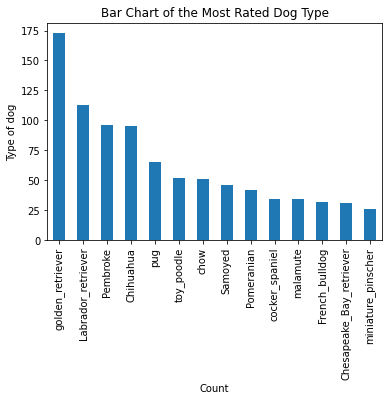

In [107]:
#Visualize for the Most Rated Dog Type

dog_types = df.groupby('dog_types').filter(lambda x: len(x) >= 25)
dog_types['dog_types'].value_counts().plot(kind = 'bar')
plt.title('Bar Chart of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')


In [108]:
df["name"].value_counts()

None       500
a           24
Charlie     10
Cooper      10
Lucy        10
          ... 
Herald       1
Ash          1
Evy          1
Crumpet      1
Ole          1
Name: name, Length: 763, dtype: int64

### Visualize for the Most common Dog name

Text(0, 0.5, 'name of dog')

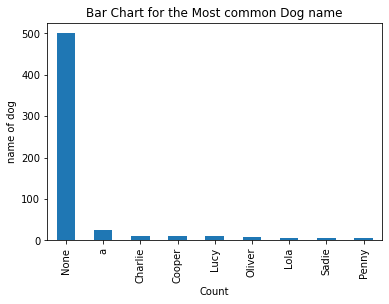

In [109]:
#Visualize for the Most common Dog name

df["name"].value_counts().iloc[0:9].plot(kind= 'bar')
plt.title('Bar Chart for the Most common Dog name')
plt.xlabel('Count')
plt.ylabel('name of dog')

In [110]:
df_name = df.drop(df.loc[df["name"] == "None"].index)
df_name['name'].value_counts()
df_name['name'].value_counts().iloc[0:8]

a          24
Charlie    10
Cooper     10
Lucy       10
Oliver      9
Penny       7
Lola        7
Sadie       7
Name: name, dtype: int64

### Visualize for the Most common Dog name without nan

Text(0, 0.5, 'name of dog')

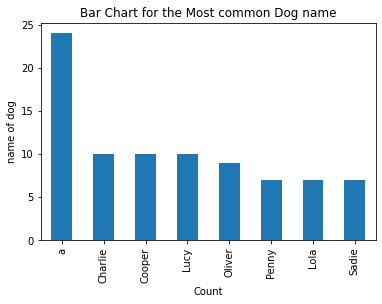

In [111]:
#Visualize for the Most common Dog name without nan

df_name = df.drop(df.loc[df["name"] == "None"].index)
df_name['name'].value_counts().iloc[0:8].plot(kind= 'bar')
plt.title('Bar Chart for the Most common Dog name')
plt.xlabel('Count')
plt.ylabel('name of dog')

In [112]:
df.groupby('dog_types')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_types,,,,,,,,
Afghan_hound,4.0,5117.250000,5827.440683,1414.0,2099.50,2623.0,5640.75,13809.0
Airedale,12.0,10026.583333,9294.394943,0.0,2573.50,8677.0,14052.00,28382.0
American_Staffordshire_terrier,16.0,7543.375000,8268.047773,0.0,2188.50,4369.0,11061.00,29063.0
Appenzeller,2.0,5946.000000,3135.311468,3729.0,4837.50,5946.0,7054.50,8163.0
Australian_terrier,2.0,6276.000000,7001.771347,1325.0,3800.50,6276.0,8751.50,11227.0
...,...,...,...,...,...,...,...,...
toy_poodle,52.0,11341.653846,16800.695270,0.0,2538.50,5570.0,14112.50,107956.0
toy_terrier,3.0,17648.666667,13557.312283,2441.0,12238.50,22036.0,25252.50,28469.0
vizsla,14.0,8685.428571,12379.252908,0.0,1465.50,2914.5,8586.25,35325.0


In [113]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_stage,dog_types
0,8.924206e+17,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,8853.0,39467.0,NaN,Welsh_springer_spaniel
1,8.921774e+17,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,6514.0,33819.0,NaN,redbone
2,8.918152e+17,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,4328.0,25461.0,NaN,German_shepherd
3,8.916896e+17,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,8964.0,42908.0,NaN,Rhodesian_ridgeback
4,8.913276e+17,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,9774.0,41048.0,NaN,miniature_pinscher


### Favorite Count Distribution Plot

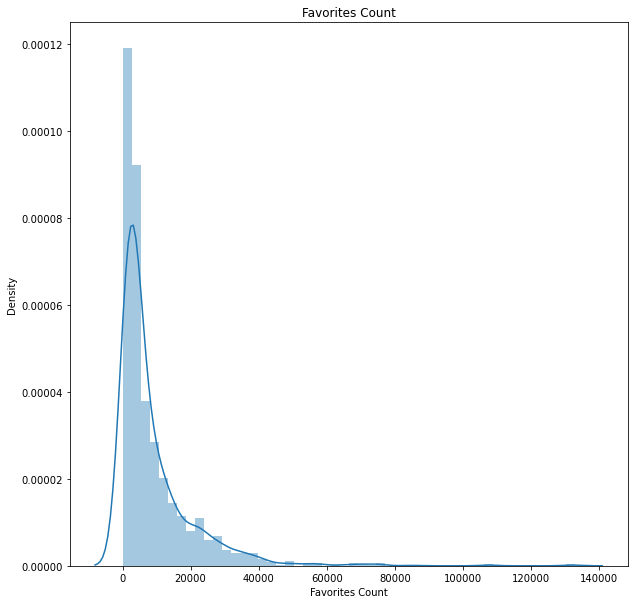

In [114]:
#Favorite Count Distribution Plot

plt.figure(figsize =(10,10))
sns.distplot(df["favorite_count"],  label = 'Favorites Count')
plt.title("Favorites Count")
plt.xlabel('Favorites Count')
plt.show()

### Retweet Count Distribution

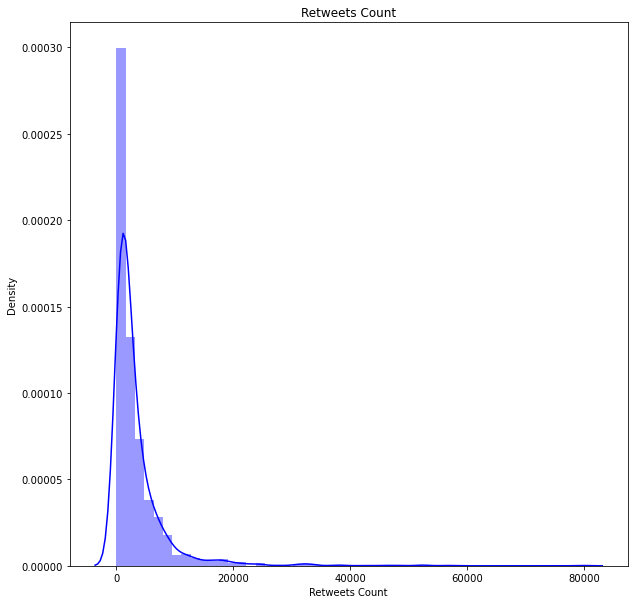

In [115]:
#Retweet Count Distribution

plt.figure(figsize =(10,10))
sns.distplot(df['retweet_count'], color = 'blue', label = 'Retweets Count')
plt.title("Retweets Count")
plt.xlabel('Retweets Count')
plt.show()

In [116]:
df['retweet_count'].describe()

count     1751.000000
mean      3413.258709
std       5410.831099
min          2.000000
25%        821.000000
50%       1722.000000
75%       3912.500000
max      79515.000000
Name: retweet_count, dtype: float64

In [117]:
df["favorite_count"].describe()

count      1751.000000
mean       8876.594517
std       11995.162133
min           0.000000
25%        2170.000000
50%        4228.000000
75%       11270.500000
max      132810.000000
Name: favorite_count, dtype: float64

### The Relationship Between Favorites and Retweets Count

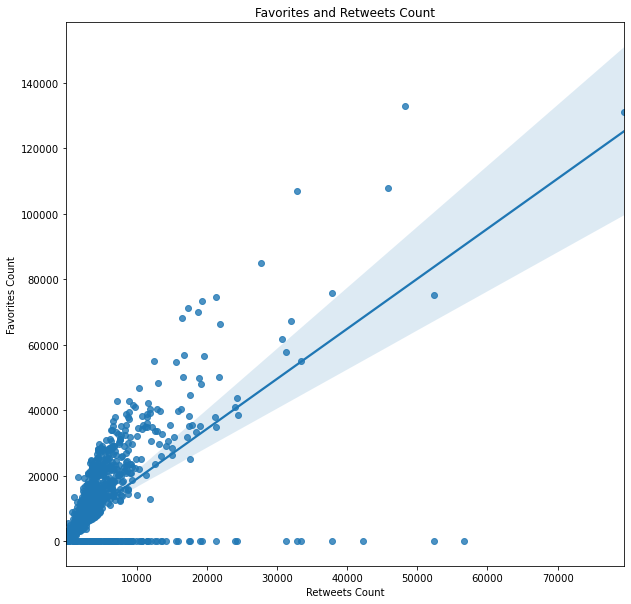

In [118]:
#The Relationship Between Favorites and Retweets Count

plt.figure(figsize =(10,10))
g = sns.regplot(x=df['retweet_count'], y=df["favorite_count"])
plt.title("Favorites and Retweets Count")
plt.xlabel('Retweets Count')
plt.ylabel('Favorites Count')
plt.show()

In [119]:
correlation = df.corr()

In [120]:
correlation

,tweet_id,rating_numerator,rating_denominator,tweet_id,img_num,p1_conf,p2_conf,p3_conf,id,retweet_count,favorite_count
tweet_id,1.000000,0.050225,-0.044383,-0.891624,-0.208599,-0.098738,-0.000020,0.056591,0.999997,0.368451,0.524670
rating_numerator,0.050225,1.000000,0.149481,-0.051891,-0.027078,-0.041511,0.036740,0.041988,0.050148,-0.000215,0.020167
rating_denominator,-0.044383,0.149481,1.000000,0.024590,-0.029022,-0.003629,0.015465,-0.002964,-0.044446,-0.029574,-0.034411
tweet_id,-0.891624,-0.051891,0.024590,1.000000,0.191738,0.104421,0.004465,-0.049916,-0.894348,-0.313181,-0.406191
img_num,-0.208599,-0.027078,-0.029022,0.191738,1.000000,0.212094,-0.173998,-0.142066,-0.211587,-0.103698,-0.141463
p1_conf,-0.098738,-0.041511,-0.003629,0.104421,0.212094,1.000000,-0.539143,-0.731536,-0.109661,-0.063854,-0.093616
p2_conf,-0.000020,0.036740,0.015465,0.004465,-0.173998,-0.539143,1.000000,0.475377,0.006082,0.019621,0.021559
p3_conf,0.056591,0.041988,-0.002964,-0.049916,-0.142066,-0.731536,0.475377,1.000000,0.063890,0.009039,0.047644
id,0.999997,0.050148,-0.044446,-0.894348,-0.211587,-0.109661,0.006082,0.063890,1.000000,0.351964,0.512740
retweet_count,0.368451,-0.000215,-0.029574,-0.313181,-0.103698,-0.063854,0.019621,0.009039,0.351964,1.000000,0.689669


### A Heatmap Visualize

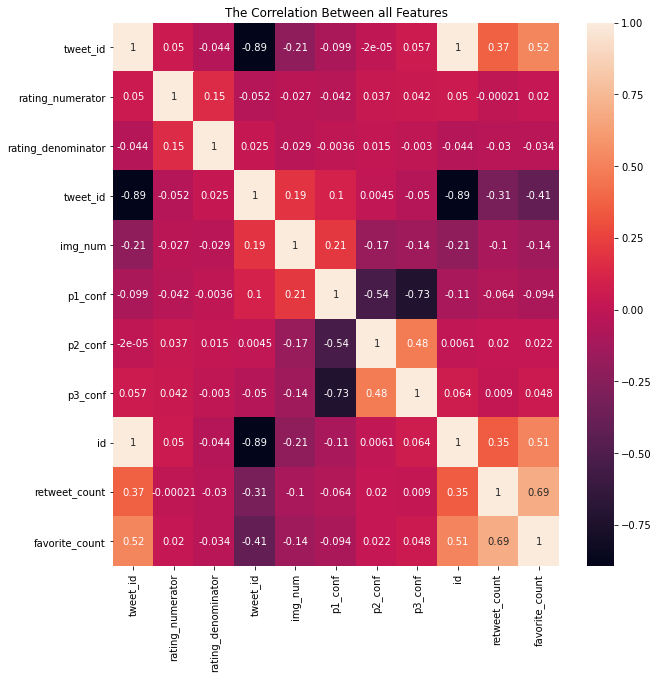

In [121]:
#A Heatmap Visualize

plt.figure(figsize =(10,10))
sns.heatmap(correlation,annot=True)
plt.title("The Correlation Between all Features")
plt.show()